ANALISIS EXPLORATORIO DE DATOS - EDA

In [4]:
#importamos las librerias
import pandas as pd 
import numpy as np
#importamos la libreria de matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [7]:
#cargamos los datos con los que vamos a trabajar
dataframe = pd.read_csv('./CSV/homicidios_final.csv', index_col=0)
dataframe

,ID,Numero de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Tipo de Calle,Comuna,Pos x,Pos y,Participantes,Acusado,Rol,Víctima,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,27
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,CARGAS,CONDUCTOR,AUTO,MASCULINO,60


A continuación, crearemos visualizaciones de indicadores generales que posteriormente podrán ser examinados más detalladamente en el dashboard, aprovechando las funcionalidades interactivas que ofrece esta herramienta. La idea es investigar los patrones en la distribución de los accidentes y las víctimas, considerando aspectos demográficos, geográficos y temporales.

Distribucion temporal de las victimas

In [ ]:
#NUMERO TOTAL DE VICTIMAS FATALES POR AÑO

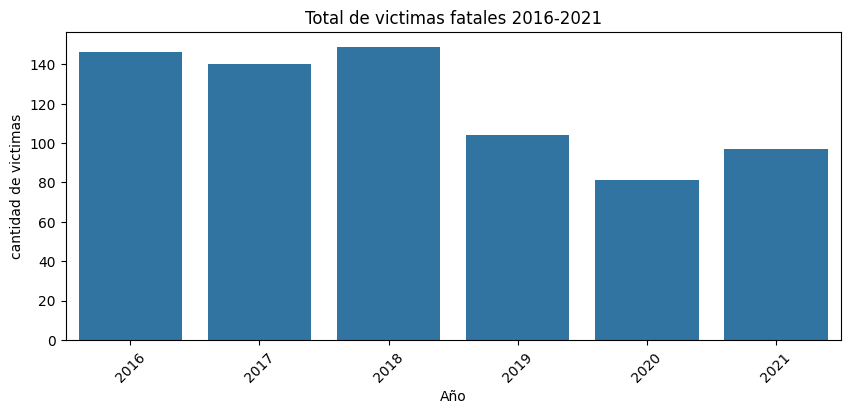

In [8]:
plt.style.use('fast')
plt.figure(figsize=(10,4))
sns.countplot(data= dataframe, x= "Año")
plt.xticks(rotation=45)
plt.ylabel('cantidad de victimas')
plt.xlabel('Año')
plt.title('Total de victimas fatales 2016-2021')
plt.show()

Conclusion: como podemos ver en el grafico desde el año 2016 al 2019 habian muchos mas casos de victimas fatales, en cambio en el 2020 baja el porcentaje de victimas fatales ya que se debe a temas de el covid 19 por cuestiones de confinamientos, etc. 

In [ ]:
#NUMERO DE VICTIMAS FATALES POR MES

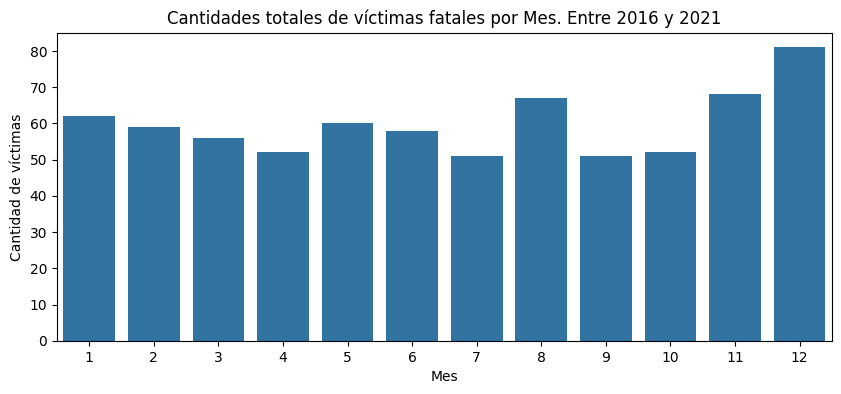

In [11]:
#DISTRIBUIMOS LAS VICTIMAS POR MES
mes = dataframe.groupby('Mes').agg({'Numero de víctimas':'count'}).reset_index()

#graficamos
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Mes', y='Numero de víctimas', data=mes)
ax.set_title('Cantidades totales de víctimas fatales por Mes. Entre 2016 y 2021')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

Conclusion: en este grafico podemos notar que tenemos una cantidad de victimas notoriamente que son los meses 'noviembre' y 'diciembre' igual pienso que los demas meses tambien tienen una cantidad notoria de victimas fatales.

In [ ]:
#DISTRIBUCION DE ACCIDENTES CON VICTIMAS FATALES POR MES, GRAFICOS ANUALES COMPARADOS

<function matplotlib.pyplot.show(close=None, block=None)>

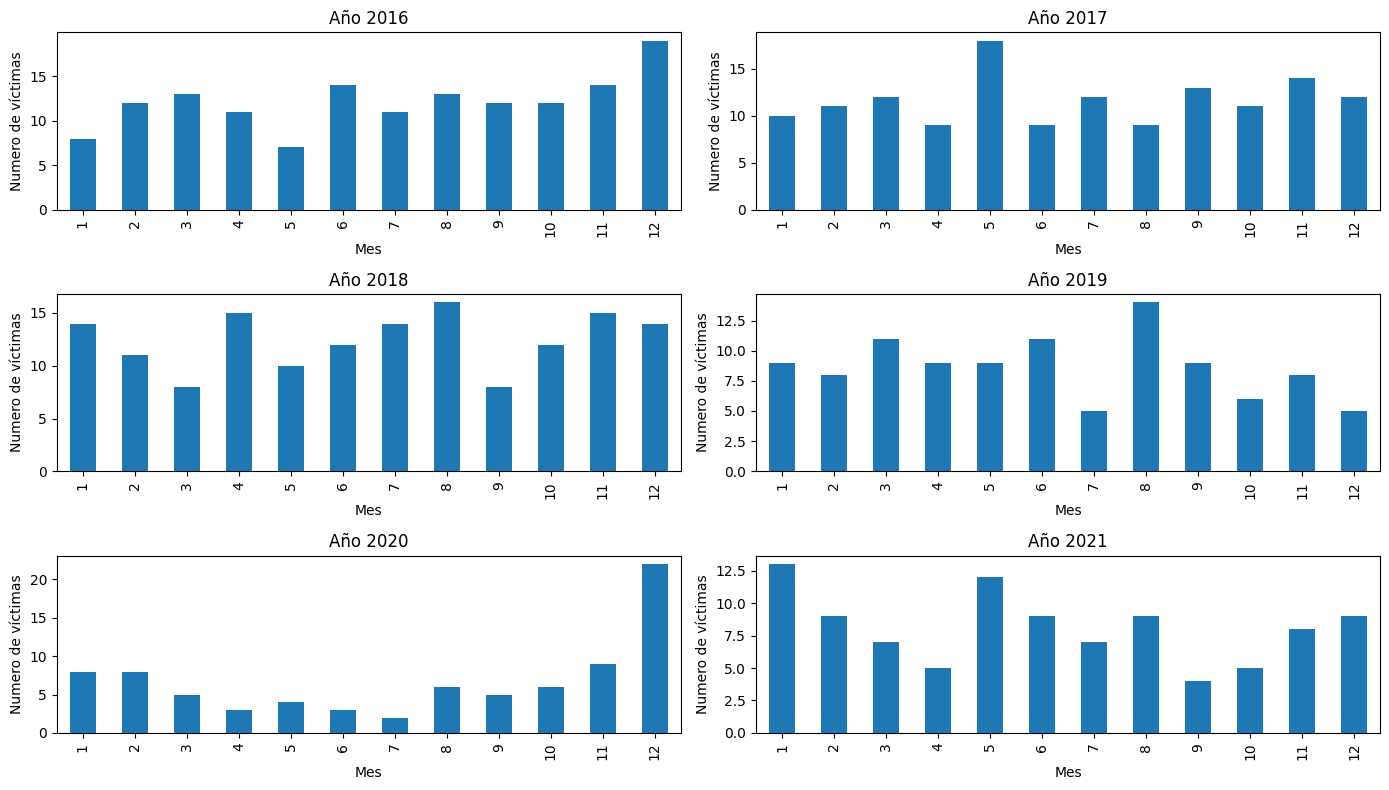

In [14]:
#grafica con subplots por año, para comparar tendencias
años = dataframe['Año'].unique()

numero_filas = 3
numero_columnas = 2
fig, axes = plt.subplots(numero_filas, numero_columnas, figsize=(14,8))
for i, year in enumerate(años):
    fila = i // numero_columnas
    columna = i % numero_columnas
    data_menusual = (dataframe[dataframe['Año'] == year].groupby('Mes').agg({'Numero de víctimas':'count'}))

# Se configura el subgráfico actual
    ax = axes[fila, columna]
    data_menusual.plot(ax=ax, kind='bar')
    ax.set_title('Año ' + str(year)) ; ax.set_xlabel('Mes') ; ax.set_ylabel('Numero de víctimas')
    ax.legend_ = None
plt.tight_layout()
plt.show

Conclusion: a diferencia de el grafico acomulado, es mirar que al analizar por año ya no observamos con tanta consistencia un patron relacionado con la accidentalidad segun mes por año.

In [ ]:
#DISTRIBUCION DE ACCIDENTES CON VICTIMAS FATALES, DIA A DIA A LO LARGO DEL MES

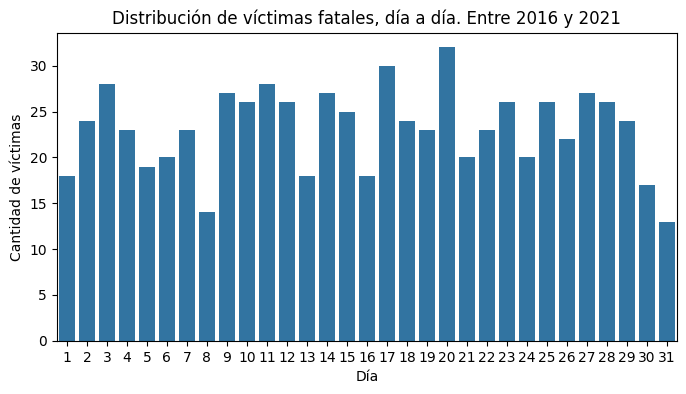

In [17]:
#Distribucion de victimas por dia de la semana
dia = dataframe.groupby('Día').agg({'Numero de víctimas':'count'}).reset_index()

#graficamos
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Día', y='Numero de víctimas', data=dia)
ax.set_title('Distribución de víctimas fatales, día a día. Entre 2016 y 2021')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

Conclusion: como podemos farnos cuenta en el grafico de dia a dia de los años 2016 hasta 2021 el porcentaje de accidentes con victimas fatales es el dia 20 de cada mes, es decir, el 20 de cada mes es el dia mas peligroso para los conductores.

In [ ]:
#DISTRIBUCION DE ACCIDENTES CON VICTIMAS FATALES, A LO LARGO DE LAS 24 HORAS

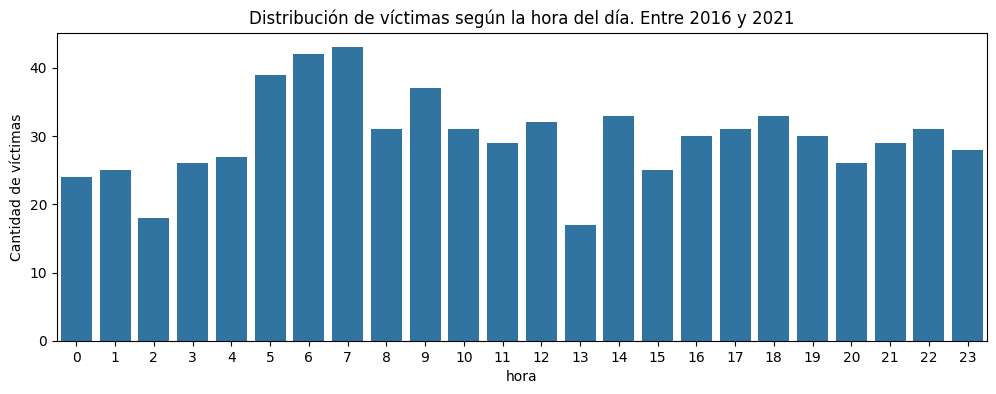

In [18]:
#Distribución de víctimas fatales según la hora del día
hora = dataframe.groupby('Hora entera').agg({'Numero de víctimas':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(12,4))
ax = sns.barplot(x='Hora entera', y='Numero de víctimas', data=hora)
ax.set_title('Distribución de víctimas según la hora del día. Entre 2016 y 2021')
ax.set_xlabel('hora') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

Conclusion: como tambien podemos darnos cuenta las horas de mayor riesgo de accidentalidad son desde las 5 horas hasta las 7 horas es decir esto ocurre cuando las personas estan yendo hacia el trabajo, escuelas o universidades

DISTRIBUCION DEMOGRAFICA DE LAS VICTIMAS

In [ ]:
#CANTIDAD DE VICTIMAS FATALES DE CADA AÑO, ENTRE 2016 Y 2021, DISCRIMINADAS POR SEXO

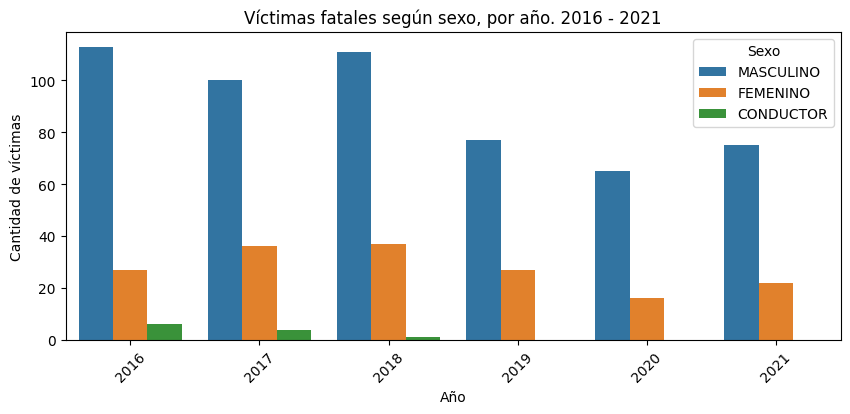

In [19]:
#Víctimas según sexo, por año
plt.figure(figsize=(10,4))
sns.countplot(data = dataframe, x = "Año", hue='Sexo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Año')
plt.title('Víctimas fatales según sexo, por año. 2016 - 2021')
plt.show()

Conclusion: es evidente que las victimas fatales sean mas masculinos que femeninos en accidentes de transito. Valdrá la pena explorar proporciones y contrastar con los tipos de vehículos involucrados, los roles y la participación de estos en los accidentes.

In [ ]:
#CANTIDAD DE VICTIMAS SEGUN SU SEXO Y RANGO DE EDAD

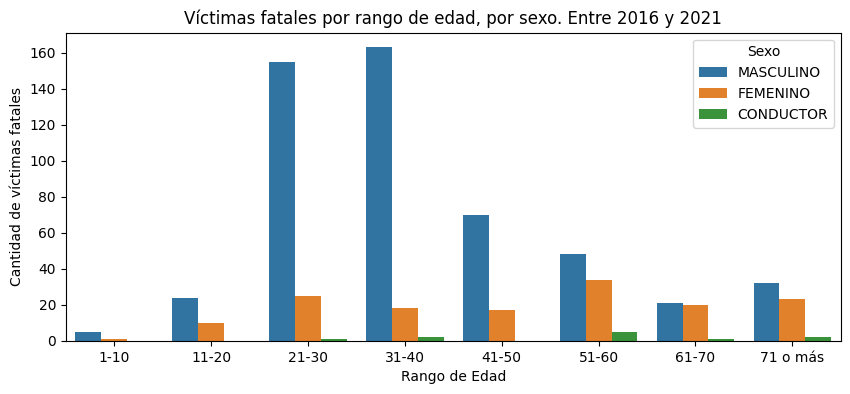

In [20]:
#Víctimas por sexo, según rango de edad 
# Creamos los rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30','31-40','41-50', '51-60', '61-70', '71 o más']
dataframe['Rango_Edad'] = pd.cut(dataframe['Edad'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,4))
sns.countplot(data = dataframe, x = "Rango_Edad", hue='Sexo')
plt.ylabel('Cantidad de víctimas fatales')
plt.xlabel('Rango de Edad')
plt.title('Víctimas fatales por rango de edad, por sexo. Entre 2016 y 2021')
plt.show()

Conclusion: visualizando el grafico nos podemos dar de cuenta que la mayor cantidad de personas que fallecen en los accidentes de transito son de los rangos de 15 a 60 años de edad y entre ellos algunos son conductores.

Estadisticas segun el tipo de usuario

In [ ]:
#victimas segun el tipo de vehiculo

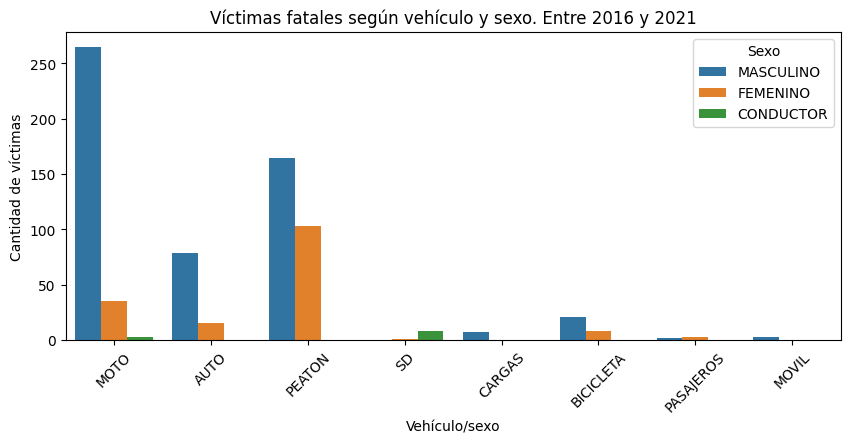

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data = dataframe, x = "Víctima", hue='Sexo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo/sexo')
plt.title('Víctimas fatales según vehículo y sexo. Entre 2016 y 2021')
plt.show()

Conclusion:como podemos ver las motocicletas y los peatones son los mas vulnerables a un accidente de transito y esta evidenciado en la grafica demostrando la cantidad de victimas fatales.

Distribución de víctimas según el Rol, es decir, la posición relativa al vehículo que presentaba ésta en el momento del siniestro.

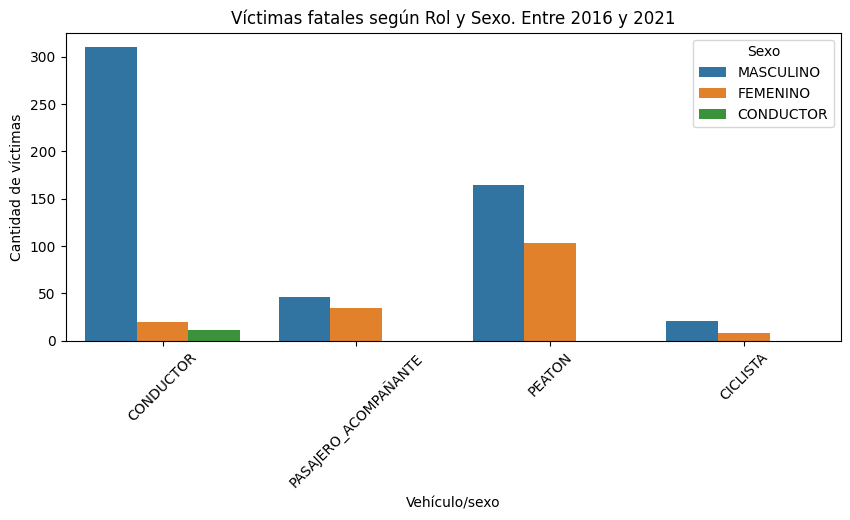

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(data = dataframe, x = "Rol", hue='Sexo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo/sexo')
plt.title('Víctimas fatales según Rol y Sexo. Entre 2016 y 2021')
plt.show()

Conclusion: son los conductores los que tienen la mayor probabilidad de tener un accidente fatal en un accidente de tráfico, seguido de los peatones.

Distibución según los participantes en los accidentes

In [ ]:
#la columna participates nos muestra la combinacion de vehiculos involucrados en los accidentes

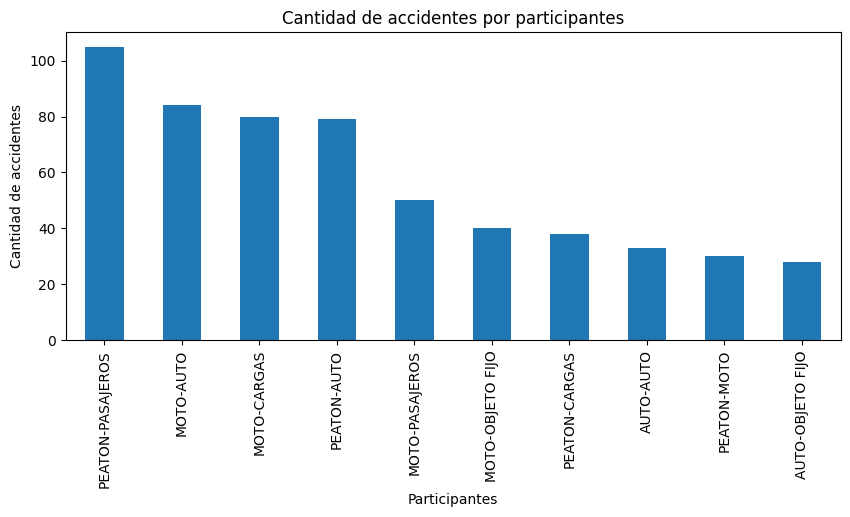

In [25]:
plt.figure(figsize=(10,4))
participantes=dataframe.groupby("Participantes")["Numero de víctimas"].count()
participantes.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Cantidad de accidentes por participantes')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Participantes')
plt.show()

Conclusion: Únicamente en dos de las diez posibles combinaciones no está involucrado un peatón o un motociclista. Esto sigue dejando en evidencia la vulnerabilidad de estos en los siniestros viales y nos da insights de hacia dónde deberían encaminarse las campañas de prevencion para reducir los indices de accidentalidad y muertes.

Distribución espacial de los accidentes con víctimas fatales

In [ ]:
#ACCIDENTES SEGUN EL TIPO DE VIA

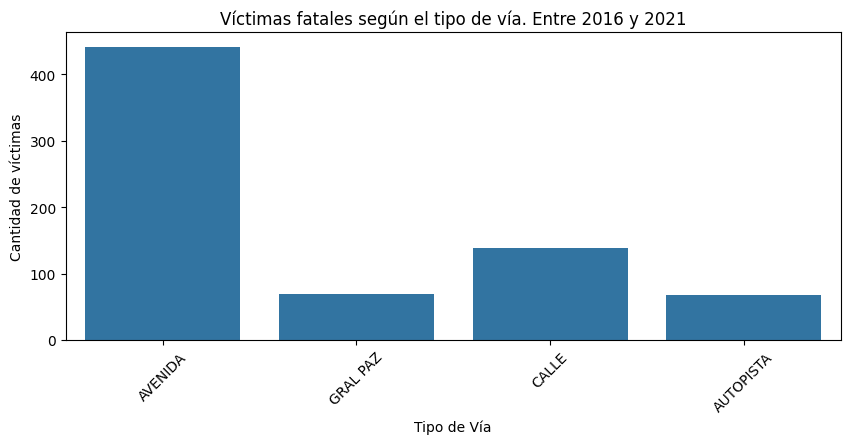

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(data = dataframe, x = "Tipo de Calle")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Tipo de Vía')
plt.title('Víctimas fatales según el tipo de vía. Entre 2016 y 2021')
plt.show()

Conclusion: claramente la accidentalidad es notoriamente mas alta en el tipo de via avenida ya que los vehiculos andan a muy altas velocidades. 

Accidentes por comuna

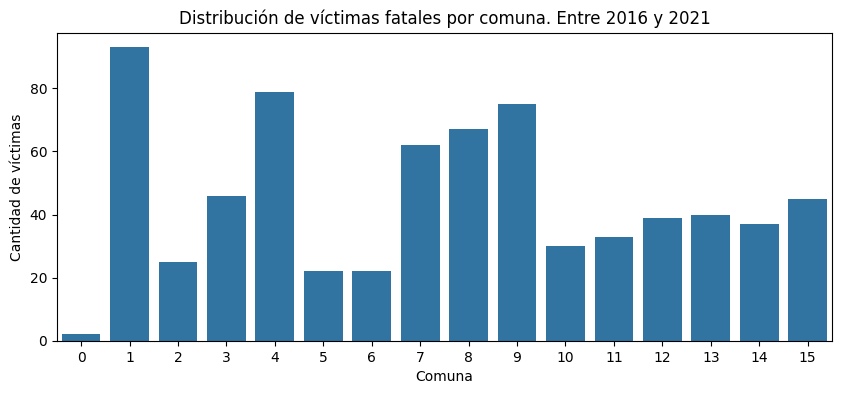

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(data = dataframe, x = "Comuna")
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Comuna')
plt.title('Distribución de víctimas fatales por comuna. Entre 2016 y 2021')
plt.show()

Conclusion: las comunas con mayor accidentalidad fatal son las 'comuna 1', 'comuna 4' y la 'comuna 9'.